# Adapted Wasserstein Distance between Gaussian Process in Discrete Time

This Jupyter notebook demonstrates how to compute the Adapted Wasserstein squared distance 
between two Gaussian processes. This computed distance will be used as a benchmark 
for approximations in future studies.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared

# Define parameters
a, b = 0, 0
var_a, var_b = 1**2, 0.5**2
t = 3

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)
b_vec, B_mat = build_mean_and_cov(t, mean_val=b, var_factor=var_b)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, b_vec, B_mat)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 1.5000
Adapted Wasserstein Distance: 1.2247


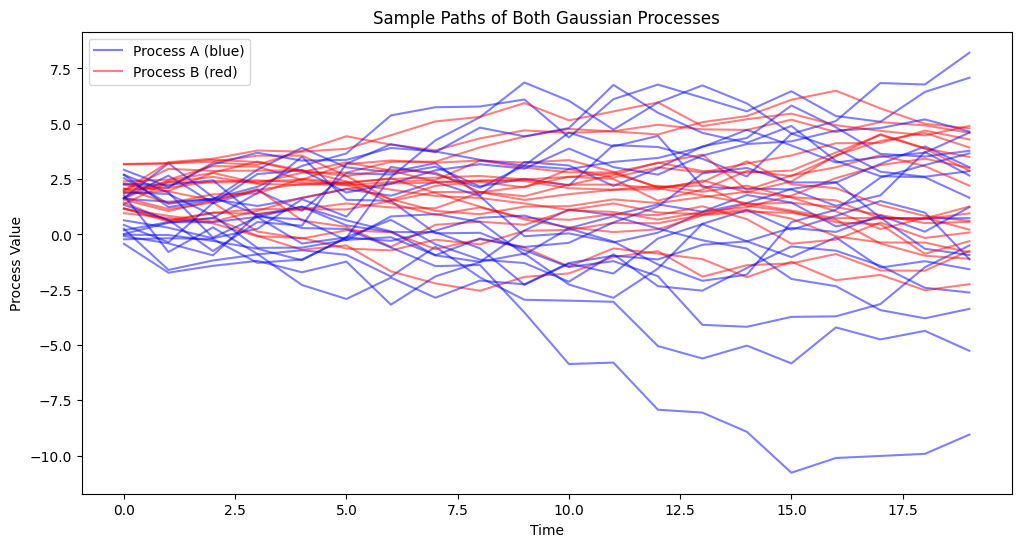

In [8]:
# Generate sample paths
num_samples = 20
np.random.seed(42)

samples_a = np.random.multivariate_normal(a_vec, A_mat, size=num_samples)
samples_b = np.random.multivariate_normal(b_vec, B_mat, size=num_samples)

time_points = np.arange(t)

# Plot sample paths
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.plot(time_points, samples_a[i], color='blue', alpha=0.5)
    plt.plot(time_points, samples_b[i], color='red', alpha=0.5)

plt.xlabel("Time")
plt.ylabel("Process Value")
plt.title("Sample Paths of Both Gaussian Processes")
plt.legend(["Process A (blue)", "Process B (red)"])
plt.show()
